In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv("MJ.csv")
data

,Unnamed: 0,G,Date,Tm,Opp,Result,PTS,Player
0,0,15,1984-11-24,CHI,POR,L,30.0,Michael Jordan
1,1,24,1984-12-12,CHI,DET,L,21.0,Michael Jordan
2,2,37,1985-01-12,CHI,CLE,L,24.0,Michael Jordan
3,3,39,1985-01-16,CHI,NJN,L,27.0,Michael Jordan
4,4,47,1985-02-01,CHI,PHI,L,31.0,Michael Jordan
...,...,...,...,...,...,...,...,...
360,360,6,1998-05-08,CHI,CHH,W,27.0,Michael Jordan
361,361,7,1998-05-10,CHI,CHH,W,31.0,Michael Jordan
362,362,11,1998-05-23,CHI,IND,L,30.0,Michael Jordan
363,363,17,1998-06-05,CHI,UTA,W,37.0,Michael Jordan


In [57]:
teams = list(data["Opp"].unique())
empty_dict = dict.fromkeys(teams, [0, 0])
for i in range(data.shape[0]):
    temp_team = data.loc[i].at["Opp"]
    if data.loc[i].at["Result"] == "W":
        temp = empty_dict[temp_team]
        empty_dict[temp_team] = [temp[0] + 1, temp[1]]
        #empty_dict[temp_team][0] += 1
        #print(empty_dict)
    else:
        temp = empty_dict[temp_team]
        empty_dict[temp_team] = [temp[0], temp[1] + 1]
        #empty_dict[temp_team][1] += 1


#temp = empty_dict["POR"]
#empty_dict["POR"] = [temp[0] + 1, temp[1]]

print(empty_dict)

for i, j in empty_dict.items():
    empty_dict[i] = 100 * (j[0] / (j[0] + j[1]))
    print(i + ": " + str(empty_dict[i]))

{'POR': [9, 4], 'DET': [10, 21], 'CLE': [13, 13], 'NJN': [10, 8], 'PHI': [11, 11], 'SAS': [2, 7], 'IND': [7, 13], 'ATL': [14, 9], 'BOS': [9, 7], 'MIL': [11, 10], 'WSB': [7, 4], 'GSW': [2, 4], 'UTA': [6, 7], 'NYK': [14, 14], 'HOU': [2, 5], 'DAL': [4, 4], 'LAC': [6, 2], 'SAC': [5, 0], 'DEN': [1, 2], 'PHO': [5, 2], 'MIA': [10, 5], 'CHH': [13, 3], 'SEA': [3, 5], 'ORL': [10, 3], 'MIN': [2, 2], 'VAN': [2, 0], 'TOR': [3, 2], 'LAL': [2, 2], 'WAS': [1, 0], 'CHI': [2, 0]}
POR: 69.23076923076923
DET: 32.25806451612903
CLE: 50.0
NJN: 55.55555555555556
PHI: 50.0
SAS: 22.22222222222222
IND: 35.0
ATL: 60.86956521739131
BOS: 56.25
MIL: 52.38095238095239
WSB: 63.63636363636363
GSW: 33.33333333333333
UTA: 46.15384615384615
NYK: 50.0
HOU: 28.57142857142857
DAL: 50.0
LAC: 75.0
SAC: 100.0
DEN: 33.33333333333333
PHO: 71.42857142857143
MIA: 66.66666666666666
CHH: 81.25
SEA: 37.5
ORL: 76.92307692307693
MIN: 50.0
VAN: 100.0
TOR: 60.0
LAL: 50.0
WAS: 100.0
CHI: 100.0


In [77]:
x = data.groupby(["Opp"])["PTS"].mean()
y = pd.DataFrame(x)
y = y.reset_index()
y["Win_Perc"] = [0] * y.shape[0]

for i in range(y.shape[0]):
    temp = y.loc[i].at["Opp"]
    y["Win_Perc"].iloc[i] = empty_dict[temp]
y

/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opp,PTS,Win_Perc
0,ATL,30.173913,60.869565
1,BOS,31.937500,56.250000
2,CHH,31.875000,81.250000
3,CHI,13.000000,100.000000
4,CLE,29.538462,50.000000
5,DAL,26.250000,50.000000
6,DEN,31.000000,33.333333
7,DET,27.774194,32.258065
8,GSW,25.166667,33.333333
9,HOU,30.857143,28.571429


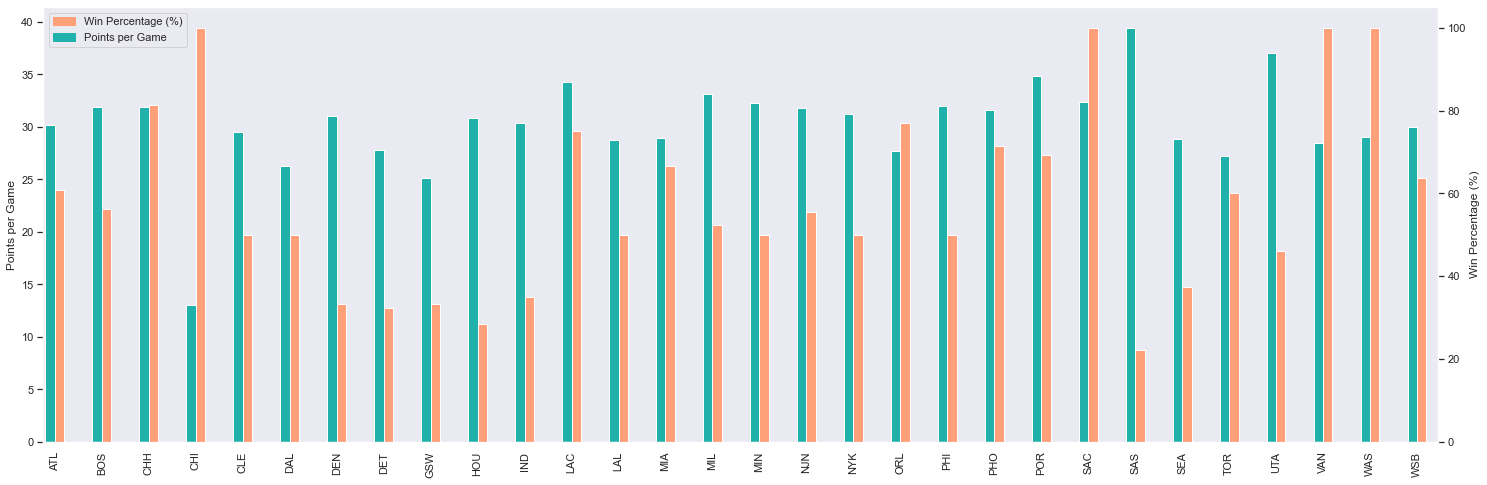

In [94]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

y.PTS.plot(kind='bar', color='lightseagreen', ax=ax, width=width, position=1)
y.Win_Perc.plot(kind='bar', color='lightsalmon', ax=ax2, width=width, position=0)

ax.grid(False)
ax2.grid(False)

ax.set_ylabel('Points per Game')
ax2.set_ylabel('Win Percentage (%)')

ax.set_xticklabels(list(y["Opp"]))

colors = {"Win Percentage (%)": "lightsalmon", "Points per Game": "lightseagreen"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig("jordan_elite.png")
plt.show()


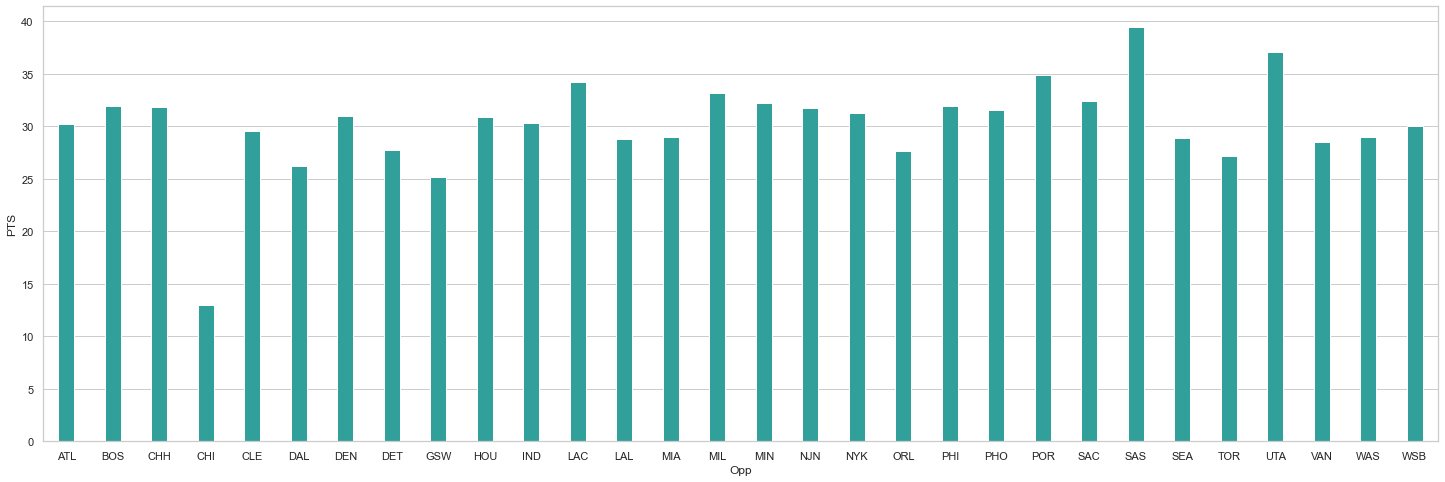

In [92]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Opp", y="PTS", data=y, color = "lightseagreen", errwidth=1)
sns.set(rc = {'figure.figsize':(25, 8)})
plt.savefig("jordan.png")



def change_width(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()